## 3. Detect faces in videos

**Objective:** Use openCV, dlib, or MTCNN face detectors to detect faces in each frame of the videos. openCV also has very simple and popular Viola-Jones face detection algorithm, but it does not have a facial landmarks detection. Facial landmarks are points corresponding to specific facial features, such as locations of eyes, nose, mouse and other features. Eyes locations are used to align faces, so all detected faces centered in the same way. Both dlib and MTCNN detect facial landmarks but MTCNN is more accurate and therefore is recommended MTCNN.

**Workflow:**

1. Load a video and loop through its frames.
2. Use chosen method to detect faces and facial landmarks for each frame of a given video. 
3. Assume that there is already a function crop_and_align() which can crop, align and scale to the desired size all detected faces according to their eyes locations. This function should accept images as input, detected locations of faces and the corresponding eyes coordinates. Extract from your face detector (dlib or MTCNN) coordinates of the bounding boxes for the faces (coordinate for the left-top corner plus width and height of the box), and locations for left and right eyes. You will implement the function crop_and_align() in the next milestone.


### Step 3.1: Loop through the frames, detect faces, and save to the disk

We extend the function above that loops through frame and save them as images by adding the face detection.

In [4]:
import numpy as np
import glob
import os
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

from mtcnn import MTCNN
detector = MTCNN()

# mostly empy function at this point
def crop_and_align(image, bbx, left_eye, right_eye):
    return image[bbx[1]:bbx[1]+bbx[3], bbx[0]:bbx[0]+bbx[2], :].copy()

# detect one face and its eyes coordinates in the given image
def detect_face(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    detection_result = detector.detect_faces(image_rgb)
    bounding_box = detection_result[0]['box']
    left_eye = detection_result[0]['keypoints']['left_eye']
    right_eye = detection_result[0]['keypoints']['right_eye']
    face = crop_and_align(image, bounding_box, left_eye, right_eye)
    if face:
        return face
    return None

# loop through frames in the video and detect faces
def detect_and_save_faces(video_path, box_scale=0.15, limit_faces=-1, save_faces=True):
    detector = MTCNN()
    faces = list()
    # add '_face' at the end to differentiate face images
    face_name = os.path.splitext(video_path)[0] + '_face'
    
    cap = cv2.VideoCapture(video_path)
    num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    for frame_no in range(num_frames):
        # if the given limit is not -1, loop only until the limit
        if limit_faces != -1 and frame_no >= limit_faces:
            break
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
        ret, frame = cap.read()
        # detect faces
        face = detect_face(frame, box_scale=box_scale)
        if face is not None:
            faces.append(face)
            if save_faces:
                cv2.imwrite(face_name + '_' + str(frame_no) + '.jpg', face)
    return faces

# save first 5 frames of real and fake videos 
real_faces = detect_and_save_faces(real_video, limit_faces=5)
fake_faces = detect_and_save_faces(fake_video, limit_faces=5)



AttributeError: module 'keras.backend.tensorflow_backend' has no attribute '_is_tf_1'

### Step 3.2: Show faces side-by-side

To check that we can correctly detect faces, show one pair of real and fake faces side-by-side.


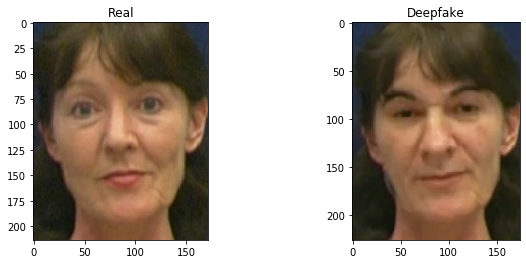

In [7]:
# show an example of the faces side by side
real_face_name = os.path.splitext(real_video)[0] + '_face_1.jpg'
fake_face_name = os.path.splitext(fake_video)[0] + '_face_1.jpg'

# define a function that will read and display given images and their difference
def read_display_images(real_image_name, fake_image_name):
    real_image = cv2.imread(real_image_name)
    fake_image = cv2.imread(fake_image_name)

    # note that images in OpenCV are in BGR format, 
    # and to plot with matplotlib, we convert them to RGB
    real_image = cv2.cvtColor(real_image, cv2.COLOR_BGR2RGB)
    fake_image = cv2.cvtColor(fake_image, cv2.COLOR_BGR2RGB)

    # find the difference between the images
    image_diff = None
    if real_image.shape == fake_image.shape:
        image_diff = real_image - fake_image

    # show the images side by side
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(real_image)
    plt.title('Real')
    plt.subplot(1, 3, 2)
    plt.title('Deepfake')
    plt.imshow(fake_image)
    if image_diff is not None:
        plt.subplot(1, 3, 3)
        plt.title('Difference')
        plt.imshow(image_diff)
    plt.show()
    return real_image, fake_image, image_diff

real_face, fake_face, _ = read_display_images(real_face_name, fake_face_name)
